# Total Output Plots

Another way to visualize enclosure decisions is by plotting total output at each enclosure rate.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from enclose import *
from ipywidgets import interact, interact_manual, fixed

## The Planner's problem

- Enclosure is costly so it is only worthwhile where the benefit from higher output/productivity compensates for the cost.  The planner sets out to find the enclosure rate and land and labor allocations that maximize total benefits net of total costs:

$$
\max_{t_e,l_e} \left[\theta \cdot F(t_e,l_e)+F(1-t_e,1-l_e) \right ] \cdot F(\bar T, \bar L) -cTt_e
$$

In the simple case of $\theta = 1$ (CW75 and DMG92) there's no gain to enclosure, so costly enclosure never worthwhile.

Total output plotted as a function of $t_e$

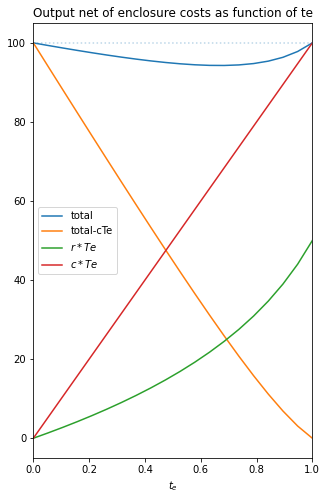

In [3]:
plotY(mu=0)

Note in the interaction that if we change lbar it is not changing Tbar/Lbar... need to fix.

In [5]:
interact(plotY, alp =(0.2,0.9,0.1), th=(0.8,3,0.05), c=(0,4,0.1));

interactive(children=(FloatSlider(value=1.0, description='th', max=3.0, min=0.8, step=0.05), IntSlider(value=1…

### Equilibrium Rental Rates and Wages as a function of $t_e$

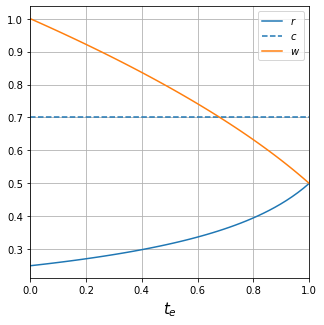

In [8]:
plotreq(th=1, alp=1/2, tlbar=1, c=0.7, wplot=True)

<AxesSubplot:title={'center':'$z(t_e) - c\\cdot t_e$'}, xlabel='$t_e$ -- pct land enclosed', ylabel='$z(t_e)$'>

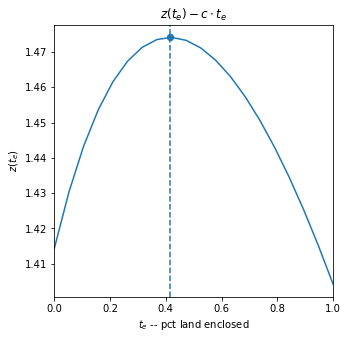

In [6]:
plotz(th = 1.7, alp=1/2, c=1, lbar=2)

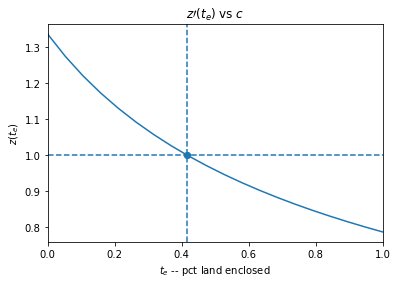

In [7]:
plotzprime(th = 1.7, alp=1/2, c=1, lbar=2)

## Compare $r(t_e), z'(t_e), c$


Three plot, with parameter space at right

In [8]:
def threeplots(th, alp, c, lbar=2, logpop=False):
    fig = plt.figure(figsize=(14, 8))
    axZ= fig.add_subplot(2,2,2)
    axZP= fig.add_subplot(2,2,4)
    axP= fig.add_subplot(1,2,1)
    
    # z() plot
    teo= teopt(th, alp, c, lbar)
    tte = np.linspace(0,1,20)
    axZ.scatter(teo, z(teo, th, alp, lbar)-c*teo, s=40, clip_on=False )
    axZ.axvline(teo, ymin=0, ymax=z(teo, th, alp, lbar) ,  linestyle='dashed')
    axZ.plot(tte, z(tte, th, alp, lbar) - c*tte )  
    axZ.set_xlim(0,1)
    axZ.set_ylabel(r'$z(t_e)$')
    # z prime, r and c plot
    axZP.scatter(teo, zprime(teo, th, alp, lbar), s=40, clip_on=False )
    axZP.axvline(teo, ymin=0, ymax=z(teo, th, alp, lbar) ,  linestyle='dashed')
    axZP.plot(tte, zprime(tte, th, alp, lbar), label=r'$z \prime$' )
    axZP.set_xlim(0,1)
    axZP.set_xlabel(r'$t_e$'+' -- pct land enclosed')
    axZP.set_ylabel(r'$z(t_e)$')
    axZP.axhline(c, color='red', linestyle ='dashed', label='c')
    axZP.legend()
    r0 = req(0, th, alp, lbar)
    r1 = req(1, th, alp, lbar)
    axZP.plot(tte, req(tte, th, alp, lbar),  label= r'$r$')
    
    axP.scatter(th, np.log(lbar), s=40)
    axP.set_xlim(0.9, 3)
    axP.set_ylim(0, 4)
    prvpart(c=c, alp=alp, full_diag=True, logpop=True, ax = axP)
    
    plt.show()
    

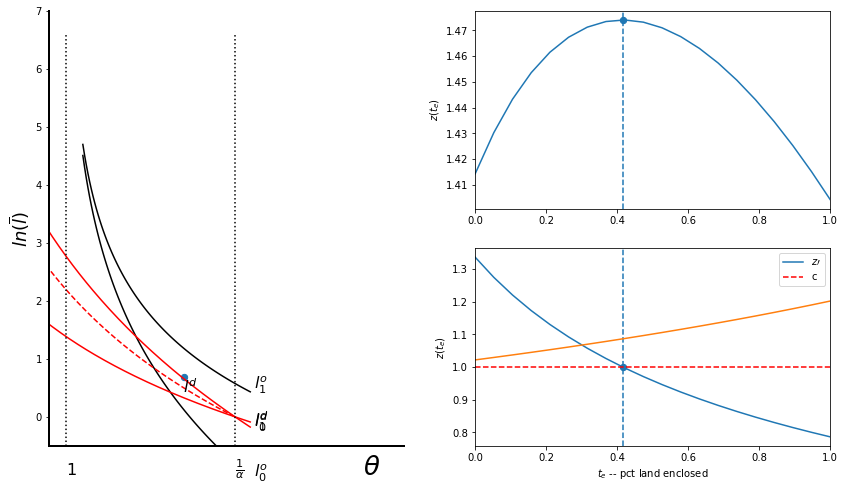

In [9]:
threeplots(th = 1.7, alp=1/2, c=1, lbar=2)

In [10]:
interact(threeplots, th =(0.9,3,0.05), alp =(0.2, 0.9, 0.1), c=(0,2,0.05), lbar=(0.5,25,0.1), logpop=fixed(True));

interactive(children=(FloatSlider(value=1.9500000000000002, description='th', max=3.0, min=0.9, step=0.05), Fl…